In [1]:
import pandas as pd
# from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import plotly.express as px
# import matplotlib.mlab as mlab
# from statistics import mean
# import pylab
import math
# import tweepy
# from botometer import Botometer
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="gianluca.nogara@gmail.com")
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import tweets_utils
import csv
import importlib
%autosave 3600

Autosaving every 3600 seconds


In [4]:
files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")
files_users = glob.glob("F:/COVID-19-Tweets/*/users.csv")

In [5]:
files_tweets

['F:/COVID-19-Tweets\\2020-01\\tweets.csv',
 'F:/COVID-19-Tweets\\2020-02\\tweets.csv',
 'F:/COVID-19-Tweets\\2020-03\\tweets.csv',
 'F:/COVID-19-Tweets\\2020-04\\tweets.csv',
 'F:/COVID-19-Tweets\\2020-05\\tweets.csv']

In [4]:
chunksize = 10
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.head()

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_status_text,quoted_status_created_at,quoted_user_id,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media
0,1219752899636613121,1219752899636613121,Tue Jan 21 22:45:27 +0000 2020,1110906564158869505,Huerconetzin,False,Wed Mar 27 14:08:59 +0000 2019,@CDC has activated its emergency operations ce...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [94, 106]}]",[],"[{'screen_name': 'AnneKPIX', 'name': 'Anne Mak...",[],[],[]
1,1219768733310291969,1219768733310291969,Tue Jan 21 23:48:22 +0000 2020,1214557289606242304,JustAnotherAme4,False,Tue Jan 07 14:40:19 +0000 2020,"Soon, passengers from Wuhan to the US, on dire...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,[],[],"[{'screen_name': 'cnni', 'name': 'CNN Internat...",[],[],[]
2,1219768903116607488,1219768903116607488,Tue Jan 21 23:49:03 +0000 2020,426033838,HHSRegion8,True,Thu Dec 01 19:14:42 +0000 2011,The first human infection with new #coronaviru...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [47, 59]}]",[],"[{'screen_name': 'CDCgov', 'name': 'CDC', 'id'...",[],[],[]
3,1219753863940648965,1219753863940648965,Tue Jan 21 22:49:17 +0000 2020,2252416118,Paxman42,False,Wed Dec 18 19:04:31 +0000 2013,Where is our FEDERAL vaccination education cam...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,"[{'text': 'lungcancer', 'indices': [103, 114]}]",[],"[{'screen_name': 'OurWarOnCancer', 'name': 'Ou...",[],[],[]
4,1219755288988798981,1219755288988798981,Tue Jan 21 22:54:57 +0000 2020,738000529775697920,beerhowell,False,Wed Jun 01 13:33:32 +0000 2016,Breaking News: The first U.S. case of the Wuha...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,[],[],"[{'screen_name': 'nytimes', 'name': 'The New Y...",[],[],[]


In [ ]:
df.info()

In [ ]:
chunksize = 10
for chunk in pd.read_csv(files_users[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.head()

In [ ]:
df.info()

## Manage data

## Get info

In [6]:
# # chunksize = int(1e6)
# total_tweets = 0
# original_n = 0
# retweet_n = 0
# reply_n = 0

# users = []
# users_retweet = []
# users_retweeted = []
# users_reply = []
# users_replied = []
users_original = []
# users_quoted = []

# ids = []
# ids_retweet = []
# ids_retweeted = []
# ids_reply = []
# ids_replied = []
# ids_original = []
# ids_quoted = []
# dates = []


cols_tweets = [u'user_screen_name', 
        u'rt_user_screen_name', u'rt_user_id', 
        u'in_reply_to_screen_name', u'in_reply_to_user_id',
        u'rt_created_at', u'in_reply_to_status_id'] 

cols_users = [u'id', u'screen_name', u'verified'] 

In [ ]:
def write_file(filename, serie_id, serie_user):
    filename = filename + ".csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "screen_name"])
        for i in range(len(serie_id)):
            writer.writerow([serie_id.keys()[i], serie_user.keys()[i]])

In [ ]:
def list_series(list_id, flag):
    if(flag == True):
        for i in range(len(list_id)):
                list_id[i] = str(int(list_id[i]))
    list_id = pd.Series(list_id).value_counts().sort_values(ascending=False)[:int(2e4)]
    return list_id

In [ ]:
# def id_user(user, u_id=u_id):
#     for i in range(len(u_id)):
#         if(user == u_id[i][1]):
#             return u_id[i][0]
#     return -1

In [ ]:
# def check_verified(user, u_id=u_id):
#     for i in range(len(u_id)):
#         if(user == u_id[i][1]):
#             if(u_id[i][2] == True):
#                 return True
#     return False

In [ ]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_users:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_users, False))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["users"])
        ids.extend(lista[i]["ids"])
        verified.extend(lista[i]["verified"])

for i in range(len(users)):
    u_id.append((ids[i], users[i], verified[i]))
    
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [ ]:
del users
del ids
del verified

In [7]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):

        users_original.extend(lista[i]["original_users"])
#         ids_original.extend(lista[i]["original_ids"])

#         ids_reply.extend(lista[i]["reply_ids"])
#         users_reply.extend(lista[i]["reply_users"])

#         ids_replied.extend(lista[i]["replied_ids"])
#         users_replied.extend(lista[i]["replied_users"])

#         ids_retweet.extend(lista[i]["retweet_ids"])
#         users_retweet.extend(lista[i]["retweet_users"])

#         ids_retweeted.extend(lista[i]["retweeted_ids"])
#         users_retweeted.extend(lista[i]["retweeted_users"])

#         total_tweets = total_tweets + lista[i]["total_len"]
#         original_n = original_n + lista[i]["original_len"]
#         retweet_n = retweet_n + lista[i]["retweet_len"]
#         reply_n = reply_n + lista[i]["reply_len"]

stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [7]:
del result
del lista
del chunk

### Process distribution

In [8]:
print("process users_retweet")
users_retweet = pd.Series(users_retweet).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_retweeted")
users_retweeted = pd.Series(users_retweeted).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_original")
users_original = pd.Series(users_original).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_reply")
users_reply = pd.Series(users_reply).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_replied")
users_replied = pd.Series(users_replied).value_counts().sort_values(ascending=False)[:int(2e4)]


process users_retweet
process users_retweeted
process users_original
process users_reply
process users_replied


In [31]:
lists = [users_retweet, users_retweeted, users_original, users_reply, users_replied]
str_lists = ["users_retweet", "users_retweeted", "users_original", "users_reply", "users_replied"]

In [33]:
for i in range(len(lists)):
    names = list(lists[i].keys())
    count = list(lists[i])
    frame = { 'Name': names, 'Count': count}
    df = pd.DataFrame(frame)
    path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/2k_tweets _count/")
    df.to_csv(path[0] + str_lists[i] + ".csv", index=False)

In [61]:
def visualize_distribution(df, string):
    index = [10, 25, 50, 75, 90]
    perc_numpy = [np.percentile(df["Count"], i, interpolation='nearest') for i in index]
    print(perc_numpy)
    fig = px.histogram(df["Count"], title=f"Distribution of {string} tweets")
    fig.show()  

In [62]:
def print_all_distributions():
    df = pd.read_csv(path[0] + "users_original.csv")
    visualize_distribution(df, "original")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_reply.csv")
    visualize_distribution(df, "reply")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_replied.csv")
    visualize_distribution(df, "replied")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_retweet.csv")
    visualize_distribution(df, "retweet")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_retweeted.csv")
    visualize_distribution(df, "retweeted")

In [64]:
print_all_distributions()

## Writing files

In [ ]:
ids_retweeted = list_series(ids_retweeted, True)
users_retweeted = list_series(users_retweeted, False)
write_file("prova_retweeted", ids_retweeted, users_retweeted)
del ids_retweeted
del users_retweeted

In [ ]:
ids_retweet = list_series(ids_retweet, True)
users_retweet = list_series(users_retweet, False)
write_file("prova_retweet", ids_retweet, users_retweet)
del ids_retweet
del users_retweet

In [ ]:
hasnan = lambda array: any(filter(math.isnan, ids_original))

In [ ]:
hasnan4(ids_original)

In [ ]:
index = []
for i in range(len(ids_original)):
    if(math.isnan(ids_original[i])):
        index.append(i)
del ids_original[index[0]:index[-1]]
del users_original[index[0]:index[-1]]

In [ ]:
index = 0
for i in range(len(ids_original)):
    if(math.isnan(ids_original[i])):
        index = i

In [ ]:
del ids_original[index]
del users_original[index]

In [ ]:
hasnan4(ids_original)

In [ ]:
ids_original = list_series(ids_original, True)
users_original = list_series(users_original, False)
write_file("prova_original", ids_original, users_original)
del ids_original
del users_original

In [ ]:
ids_replied = list_series(ids_replied, True)
users_replied = list_series(users_replied, False)
write_file("prova_replied", ids_replied, users_replied)
del ids_replied
del users_replied

In [ ]:
ids_reply = list_series(ids_reply, True)
users_reply = list_series(users_reply, False)
write_file("prova_reply", ids_reply, users_reply)
del ids_reply
del users_reply

## Stats

In [ ]:
print(f'Number of total tweets: {total_tweets}')
print(f'Number of original tweets: {original_n}')
print(f'Number of retweet: {retweet_n}')
print(f'Number of reply: {reply_n}')

perc_original = np.around(original_n*100/total_tweets,2)
perc_retweet = np.around(retweet_n*100/total_tweets,2)
perc_reply = np.around(reply_n*100/total_tweets,2)
print(f'Number of original_tweets: {perc_original}% of total tweets')
print(f'Number of retweets: {perc_retweet}% of total tweets')
print(f'Number of replies: {perc_reply}% of total tweets')

print('Check sum == len(tweets): ',original_n + retweet_n + reply_n == total_tweets)

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.bar(np.arange(3), np.asarray([original_n, retweet_n, reply_n])*(100/total_tweets))
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['tweets', 'retweets', 'replies'])
ax.set_ylabel('%')
ax.yaxis.grid(True)
ax.set_ylim([0,100])
ax.set_title('Distribution of Tweets')
#plt.savefig('files/plots/tweets_division')
plt.show()

In [ ]:
original = "Original Tweets"
retweet = "Retweets"
reply = "Replies"
label = [original, retweet, reply]
data = [original_n, retweet_n, reply_n]
explode = (0.1, 0.1, 0.1)
  
# Creating color parameters
colors = ( "lightgreen", "orange", "cyan")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
          
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, label,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Data pie chart")
plt.show()

## Top 30 - Original tweets

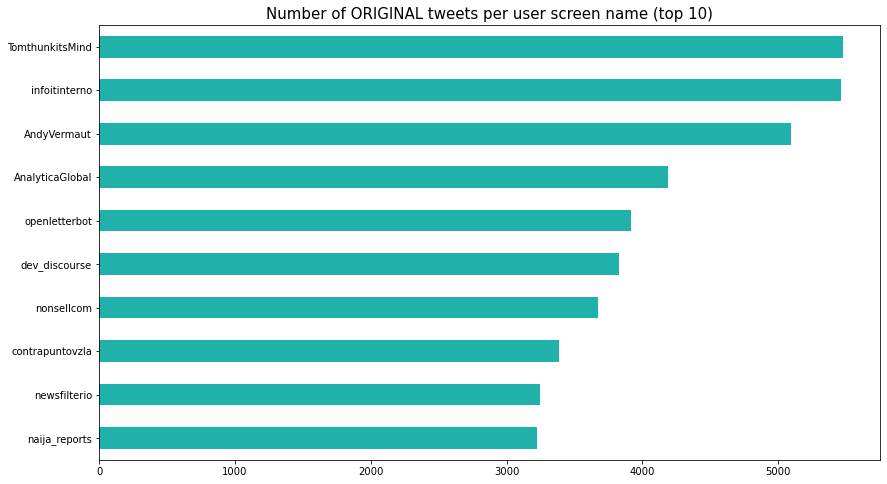

In [10]:
# val = pd.Series(users_original)
# val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Retweets

In [ ]:
val = pd.Series(users_retweet)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Number of RETWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Retweeted

In [ ]:
val = pd.Series(users_retweeted)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Replied

In [ ]:
val = pd.Series(users_replied)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Responsive

In [ ]:
val = pd.Series(users_reply)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14))  #red #darkturquoise
ax.set_title('Number of REPLIES per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

## Daily Tweets

In [ ]:
val = pd.Series(dates)
val = val.value_counts(sort=True) 
fig = plt.figure(figsize=(14, 8))
ax = val[:25].plot(kind='bar', color='green', fig=(14,14))
ax.set_title('Number of TWEETS per day', fontsize=15)
# ax.invert_yaxis()
ax.set_xticklabels(val.index.format(), rotation='vertical')
plt.show()